TP 3 : Validation croisée
=======

1 - Introduction 
------

L'objectif de ce TP est de classer une base de données radar. Il sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.

- Python 3: https://docs.python.org/3/
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/
- Matplotilb: https://matplotlib.org/contents.html
- Scikit-learn: http://scikit-learn.org

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

La base de donnée que vous étudierez est la base Ionosphere (http://archive.ics.uci.edu/ml/datasets/Ionosphere ). Vous pouvez la télécharger sur la page web de la base de données (http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data ).

La base Ionosphere contient 351 mesures radars. Chaque mesure est décrite par un descripteur de 34 dimensions. L'objectif est de détecter la présence ou non d'électron libre dans l'ionosphère. Pour plus de détail sur la base, vous pourrez vous référer à la description donnée par la page web de cette dernière.

2 - Lecture de la base de donnée
----

### 2.1 - Lecture des fichiers

Nous allons dans cette partie lire les données de la base de donnée. Commencez par télécharger le fichier de la base. Ce fichier contient une ligne par exemple et 35 colonnes pour le décrire. La dernière colonne est une lettre donnant la classe de l'exemple, 'g' pour good et 'b' pour bad. En utlisant la fonction `np.genfromtxt` (https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html ), lisez le fichier de données et construisez de tableau `X` et `y` contenant respectivement les données radar et les labels.

In [6]:
data = np.genfromtxt('ionosphere.data',delimiter="," )

In [3]:
#On peut également transformer le fichier en .txt et l'ouvrir de la meme manière


array([[ 1.     ,  0.     ,  0.99539, ...,  0.18641, -0.453  ,      nan],
       [ 1.     ,  0.     ,  1.     , ..., -0.13738, -0.02447,      nan],
       [ 1.     ,  0.     ,  1.     , ...,  0.56045, -0.38238,      nan],
       ...,
       [ 1.     ,  0.     ,  0.94701, ...,  0.92697, -0.00577,      nan],
       [ 1.     ,  0.     ,  0.90608, ...,  0.87403, -0.16243,      nan],
       [ 1.     ,  0.     ,  0.8471 , ...,  0.85764, -0.06151,      nan]])

In [4]:
data2 = np.genfromtxt('ionosphere.data',delimiter=",",dtype='|S5' )

In [5]:
data2

array([[b'1', b'0', b'0.995', ..., b'0.186', b'-0.45', b'g'],
       [b'1', b'0', b'1', ..., b'-0.13', b'-0.02', b'b'],
       [b'1', b'0', b'1', ..., b'0.560', b'-0.38', b'g'],
       ...,
       [b'1', b'0', b'0.947', ..., b'0.926', b'-0.00', b'g'],
       [b'1', b'0', b'0.906', ..., b'0.874', b'-0.16', b'g'],
       [b'1', b'0', b'0.847', ..., b'0.857', b'-0.06', b'g']], dtype='|S5')

In [2]:

X = data[:,0:-1].astype(float)
y = (data[:,-1]==b'g').astype(int)

Vérifiez que vous avez la bonne taille pour la base de donnée et pour le nombre d'attribut des exemples.

In [3]:
print('Dimension de X:',X.shape,'\nDimension de y:',y.shape)

Dimension de X: (351, 34) 
Dimension de y: (351,)


### 2.2 - Découpage en un ensemble d'entrainement et un de test

La base de donnée contient un unique ensemble de donnée contenant toutes les données. Il va falloir construire au moins deux ensembles distincts, l'un pour entraîner notre classifieur et l'autre pour le tester.

Le code suivant permet de créer ces deux ensembles de manière équilibrée (autant d'image dans l'ensemble d'entrainement que dans l'ensemble de test): 


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Modifier le code précédent afin d'avoir 2/3 des exemples pour l’entraînement et 1/3 pour le test. 
Vérifier que les deux ensembles que vous avez créés ont le bon nombre d'exemple.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)
print('Dimension de X_train:',X_train.shape,'\nDimension de X_test:',X_test.shape)
print('Proportion de X_train:',X_train.shape[0]/X.shape[0],'\nProportion de X_test:',X_test.shape[0]/X.shape[0])

Dimension de X_train: (234, 34) 
Dimension de X_test: (117, 34)
Proportion de X_train: 0.6666666666666666 
Proportion de X_test: 0.3333333333333333


3 - Comparaison de différent critère d'évaluation des performances
-----

Nous allons tester dans cette partie plusieurs critères d'évaluation des performances d'un algorithme d'apprentissage de type SVM.

Commencez par apprendre un SVM linéaire sur vos données d'apprentissage.

In [6]:
svc = svm.SVC(gamma='scale').fit(X_train,y_train)

Nous allons maintenant évaluer les performances de ce SVM sur la base de test. Nous allons pour cela utiliser différentes mesures de performances.

Pour chacune des méthodes d'évaluation que vous testerez, n'oubliez pas de vérifier si vous savez bien ce qu'il représente et comment le calculer.

### 3.1 - Le nombre d'erreur de classification

Le premier critère que nous allons calculer, est le nombre moyenne d'erreur de notre classifieur. Pour cela commencez par calculer les labels prédits par votre SVM sur les données de test (utilisez la méthode `predict` du SVM). Puis calculer la proportion d'erreur à l'aide de la fonction `accuracy_score` (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html ). 

In [7]:
y_pred = svc.predict(X_test)
print('ACC =',accuracy_score(y_test, y_pred))

ACC = 0.9230769230769231


Votre classifieur donne-t-il de bonne performance ? 

### 3.2 - La matrice de confusion

La matrice de confusion d'un problème de classification est une matrice représentant la performance de classification d'un algorithme multi-classe pour chacune des classes. Chaque ligne représente une classe réelle tandis que chaque colonne représente le nombre d'exemple classé par le classifieur dans cette classe. Par exemple, si la valeur de la case à la ligne 2, colonne 3 est 12, il y a 12 exemples de la classe 2 qui ont été attribué à la classe 3. L'objectif est d'avoir que des valeurs sur la diagonale et des zéros partout ailleurs. Calculez la matrice de confusion avec la fonction `confusion_matrix` ( https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html ).

In [8]:
print('Matrice de confusion:\n',confusion_matrix(y_test, y_pred))

Matrice de confusion:
 [[36  9]
 [ 0 72]]


Que pouvez vous dire sur votre algorithme en regardant les valeurs de cette matrice ?

### 3.3 - L'aire sous la courbe ROC

Affichez la courbe ROC (vous pouvez réutiliser le code du TP précédent). Calculez l'aire sous la courbe à l'aide de la fonction `auc` (comme dans le TP précédent). Comparez la valeur trouvée au résultat de la fonction `roc_auc_score` ( https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html ). 
**Attention: cette fonction prend en argument les valeurs de la fonction de decision et non les labels prédit.** Pensez à utiliser la méthode `decision_function` de `svc`.

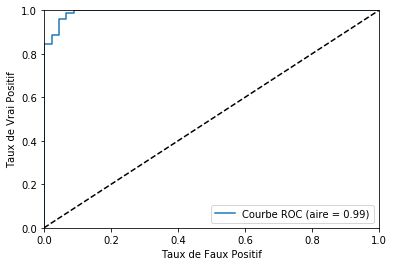

ROC auc (roc_curve et auc) 0.9929012345679012
ROC auc (  roc_auc_score ) 0.9929012345679012


In [9]:
score_pred = svc.decision_function(X_test)

fpr,tpr,thresholds = roc_curve(y_test,score_pred)
roc_auc = auc(fpr,tpr)
plt.clf()
plt.plot(fpr, tpr, label='Courbe ROC (aire = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de Faux Positif')
plt.ylabel('Taux de Vrai Positif')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print('ROC auc (roc_curve et auc)',roc_auc)
print('ROC auc (  roc_auc_score )',roc_auc_score(y_test, score_pred))

### 3.4 - L'aire sous la courbe de rappel/précision

Affichez la courbe de rappel/précision. Le code est très similaire à celui de la courbe ROC, il faut juste utiliser la fonction `precision_recall_curve` au lieu de `roc_curve` et `average_precision_score` à la place de `roc_auc_score`. Calculez l'aire sous la courbe et comparez la valeur trouvée au résultat de la fonction. 

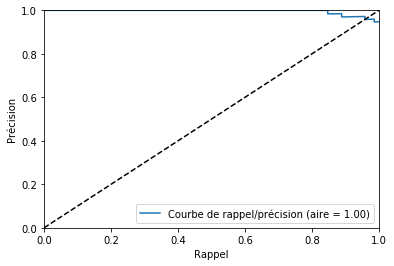

Aire sous la courbe Rappel/Précision (precision_recall_curve et auc) 0.995437607516175
Aire sous la courbe Rappel/Précision (    average_precision_score  ) 0.9954702902495366


In [10]:
score_pred = svc.decision_function(X_test)

precision,recall,thresholds = precision_recall_curve(y_test,score_pred)
ap_auc = auc(recall,precision)
plt.clf()
plt.plot(recall,precision, label='Courbe de rappel/précision (aire = %0.2f)' % ap_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.legend(loc="lower right")
plt.show()

print('Aire sous la courbe Rappel/Précision (precision_recall_curve et auc)',ap_auc)
print('Aire sous la courbe Rappel/Précision (    average_precision_score  )',average_precision_score(y_test, score_pred))

4 - Cross-validation des paramètres de l'algorithme d'apprentissage
--------

Nous allons maintenant nous intéresser à trouver le meilleur jeu de paramètre pour notre SVM. Nous allons tester différent type de noyaux ainsi que différentes valeurs de paramètres.  

Pour cela nous aurons besoin d'utiliser un ensemble de validation pour trouver les meilleurs paramètres. Pour réaliser cela, nous nous appuierons sur la classe `GridSearchCV`. 

Étudiez le code suivant, trouvant les meilleurs paramètres parmi une liste de valeurs possibles pour optimiser un classifieur selon le nombre d'erreur de classification  :

In [11]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1, 1e-2, 1e-3, 1e-4],
                     'C': [1e-2,1e-1,1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1e-2,1e-1,1, 10, 100, 1000]}]

clf_grid = GridSearchCV(svm.SVC(probability=True), 
       tuned_parameters, cv=5, scoring='accuracy')
clf_grid.fit(X_train, y_train)

print('\033[34mMeilleur jeu de paramètre trouvé parmi les paramètres proposés:\033[0m')
print(clf_grid.best_estimator_,'\n')
print("\033[34mGrille des scores par combinaison de paramètres testés:\033[0m")
    
elements = clf_grid.cv_results_
for i in np.argsort(elements['mean_test_score']):
    print("%0.3f (+/-%0.03f) for %r"% (elements['mean_test_score'][i],
                                       elements['std_test_score'][i],
                                       elements['params'][i]))

Meilleur jeu de paramètre trouvé parmi les paramètres proposés:
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 

Grille des scores par combinaison de paramètres testés:
0.654 (+/-0.005) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.654 (+/-0.005) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
0.654 (+/-0.005) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.654 (+/-0.005) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.654 (+/-0.005) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.654 (+/-0.005) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.654 (+/-0.005) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.654 (+/-0.005) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.654 (+/-0.005) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.654 (+/-0.005) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.752 (+/

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Est-ce que tous les jeux de paramètre sont équivalents ? Y-a-t il une combinaison meilleure que les autres ?

Testez une cross-validation selon un autre critère de performance. Vous pouvez utiliser par exemple, l'aire sous la courbe ROC (`roc_auc`) ou  l'aire sous la courbe de rappel/précision (`average_precision`).

In [12]:
clf_grid = GridSearchCV(svm.SVC(probability=True), 
       tuned_parameters, cv=5, scoring='roc_auc')
clf_grid.fit(X_train, y_train)

print('\033[33mCritère de sélection: roc_auc')
print('\033[34mMeilleur jeu de paramètre trouvé parmi les paramètres proposés:\033[0m')
print(clf_grid.best_estimator_,'\n')
print("\033[34mGrille des scores par combinaison de paramètres testés:\033[0m")
    
elements = clf_grid.cv_results_
for i in np.argsort(elements['mean_test_score']):
    print("%0.3f (+/-%0.03f) for %r"% (elements['mean_test_score'][i],
                                       elements['std_test_score'][i],
                                       elements['params'][i]))
    
##########################################################################################
print('\n\n\033[33mCritère de sélection: average_precision')
clf_grid = GridSearchCV(svm.SVC(probability=True), 
       tuned_parameters, cv=5, scoring='average_precision')
clf_grid.fit(X_train, y_train)

print('\033[34mMeilleur jeu de paramètre trouvé parmi les paramètres proposés:\033[0m')
print(clf_grid.best_estimator_,'\n')
print("\033[34mGrille des scores par combinaison de paramètres testés:\033[0m")
    
elements = clf_grid.cv_results_
for i in np.argsort(elements['mean_test_score']):
    print("%0.3f (+/-%0.03f) for %r"% (elements['mean_test_score'][i],
                                       elements['std_test_score'][i],
                                       elements['params'][i]))    

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Critère de sélection: roc_auc
Meilleur jeu de paramètre trouvé parmi les paramètres proposés:
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 

Grille des scores par combinaison de paramètres testés:
0.829 (+/-0.040) for {'C': 100, 'kernel': 'linear'}
0.833 (+/-0.066) for {'C': 10, 'kernel': 'linear'}
0.842 (+/-0.038) for {'C': 1, 'kernel': 'linear'}
0.850 (+/-0.025) for {'C': 1000, 'kernel': 'linear'}
0.860 (+/-0.048) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.877 (+/-0.052) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.902 (+/-0.035) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.906 (+/-0.036) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.911 (+/-0.027) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.917 (+/-0.031) for {'C': 0.1, 'kernel': 'linear'}
0.920 (+/-0.029) for {'C': 10, 'gamma'

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Selon ces différents critères, trouvez-vous toujours les même jeux de paramètres optimales, le même classement entre les différents jeux de paramètres ?  

Testez maintenant les paramètres optimaux que vous venez de trouver sur les données de test. Quelles sont les performances que vous obtenez ? 

In [13]:
y_pred2 = clf_grid.predict(X_test)
score_pred2 = clf_grid.decision_function(X_test)
print('\033[33mCross validation selon l\'average_precision\033[0m')
print()

print('\033[34mACC ( svm par défaut ):\033[0m',accuracy_score(y_test, y_pred))
print('\033[34mACC (svm cross-validé):\033[0m',accuracy_score(y_test, y_pred2))
print()

print('\033[34mMatrice de confusion ( svm par défaut ):\033[0m\n',confusion_matrix(y_test, y_pred))
print('\033[34mMatrice de confusion (svm cross-validé):\033[0m\n',confusion_matrix(y_test, y_pred2))
print()

print('\033[34mROC auc ( svm par défaut ):\033[0m',roc_auc_score(y_test, score_pred))
print('\033[34mROC auc (svm cross-validé):\033[0m',roc_auc_score(y_test, score_pred2))
print()

print('\033[34mAire sous la courbe Rappel/Précision ( svm par défaut )\033[0m',average_precision_score(y_test, score_pred))
print('\033[34mAire sous la courbe Rappel/Précision (svm cross-validé)\033[0m',average_precision_score(y_test, score_pred2))

Cross validation selon l'average_precision

ACC ( svm par défaut ): 0.9230769230769231
ACC (svm cross-validé): 0.9487179487179487

Matrice de confusion ( svm par défaut ):
 [[36  9]
 [ 0 72]]
Matrice de confusion (svm cross-validé):
 [[39  6]
 [ 0 72]]

ROC auc ( svm par défaut ): 0.9929012345679012
ROC auc (svm cross-validé): 0.9904320987654321

Aire sous la courbe Rappel/Précision ( svm par défaut ) 0.9954702902495366
Aire sous la courbe Rappel/Précision (svm cross-validé) 0.9941539920019755
